# Вся работа состоит из трех больших блоков:

- #### Базовые операции с датафреймами
- #### Вычисление новых признаков и группировка данных
- #### Визуализация данных



# Авторские подсказки

В каждом задании вам даны авторские подсказки - результат выполнения авторского кода для решения этой задачи. Они вам даны просто для понимания, в правильном ли направлении вы идете. Формат вывода вашего кода не обязательно должен совпадать с форматом в подсказках. Ячейки с ответом изменять не рекомендуется - проводите эксперименты в новых.


# Описание задачи

Задача кредитного скоринга - одна из наиболее популярных областей в банковской индустрии, где применяется анализ данных

Признаки клиентов банка:

- ```age``` - возраст (вещественный)
- ```MonthlyIncome``` - месячный доход (вещественный)
- ```DebtRatio``` - Debt-to-income Ratio (вещественный)
- ```NumberOfOpenCreditLinesAndLoans``` - число заемов и кредитных линий
- ```NumberRealEstateLoansOrLines``` - число ипотек и заемов, связанных с недвижимостью (натуральное число)
- ```NumberOfDependents``` - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)
- ```defaulted``` - выплачен или не выплачен в конечном итоге кредит заемщиком

В этой работе мы будем исследовать данные о заемщиках и научимся отвечать на вопросы о предоставленных нам данных.

# Базовые операции с датафреймами

## Задача 1

Считайте файл ```credit_data.csv``` в переменную ```df```

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_data.csv')

Определите размер таблицы

In [5]:
df.shape

(150000, 7)

Посмотрите первые пять строк

In [ ]:
df.head()

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,45,0.802982,9120.0,13,6,2.0
1,0,40,0.121876,2600.0,4,0,1.0
2,0,38,0.085113,3042.0,2,0,0.0
3,0,30,0.036050,3300.0,5,0,0.0
4,0,49,0.024926,63588.0,7,1,0.0


Выведите список названий столбцов

In [ ]:
df.columns

Index(['defaulted', 'age', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents'],
      dtype='object')

## Задача 2

Определите число пропусков в каждом столбце (могут пригодиться методы ```isnull``` и ```sum```)

In [ ]:
df.isnull()

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
149995,False,False,False,False,False,False,False
149996,False,False,False,False,False,False,False
149997,False,False,False,True,False,False,False
149998,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

defaulted                              0
age                                    0
DebtRatio                              0
MonthlyIncome                      29731
NumberOfOpenCreditLinesAndLoans        0
NumberRealEstateLoansOrLines           0
NumberOfDependents                  3924
dtype: int64

Определите долю пропусков в каждом столбце (могут пригодиться методы ```isnull``` и ```mean```)

In [ ]:
df.isnull().mean()

defaulted                          0.000000
age                                0.000000
DebtRatio                          0.000000
MonthlyIncome                      0.198207
NumberOfOpenCreditLinesAndLoans    0.000000
NumberRealEstateLoansOrLines       0.000000
NumberOfDependents                 0.026160
dtype: float64

## Задача 3

 Определите долю заемщиков, которые не выплатили кредит (колонка ```defaulted```)

In [ ]:
df.defaulted.mean()

0.06684

## Задача 4

 Определите количество заемщиков, у которых ежемесячный доход ```MonthlyIncome``` выше среднего.

In [ ]:
df.MonthlyIncome.mean()

6670.221237392844

In [ ]:
df.MonthlyIncome >= df.MonthlyIncome.mean()

0          True
1         False
2         False
3         False
4          True
          ...  
149995    False
149996    False
149997    False
149998    False
149999     True
Name: MonthlyIncome, Length: 150000, dtype: bool

In [ ]:
df.MonthlyIncome[df.MonthlyIncome >= df.MonthlyIncome.mean()].size

44146

## Задача 5

 Вычислите медианный возраст заемщиков, которые не вернули кредит (```defaulted=1```). Он больше или меньше медианного возраста всех заемщиков?

In [ ]:
df

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,45,0.802982,9120.0,13,6,2.0
1,0,40,0.121876,2600.0,4,0,1.0
2,0,38,0.085113,3042.0,2,0,0.0
3,0,30,0.036050,3300.0,5,0,0.0
4,0,49,0.024926,63588.0,7,1,0.0
...,...,...,...,...,...,...,...
149995,0,74,0.225131,2100.0,4,1,0.0
149996,0,44,0.716562,5584.0,4,1,2.0
149997,0,58,3870.000000,NaN,18,1,0.0
149998,0,30,0.000000,5716.0,4,0,0.0


In [ ]:
df.age[df.defaulted ==1]

0         45
13        40
21        38
25        50
51        31
          ..
149954    46
149955    41
149961    31
149968    55
149979    55
Name: age, Length: 10026, dtype: int64

In [ ]:
df.age[df.defaulted ==1].median()

45.0

In [ ]:
df.age.median()

52.0

In [ ]:
df.age[df.defaulted ==1].median() > df.age.median()

False

## Задача 6

 Сколько заемщиков старше 40 лет имеют ежемесячный доход больше среднего ежемесячного дохода по всей выборке?

In [ ]:
df.age > 40

0          True
1         False
2         False
3         False
4          True
          ...  
149995     True
149996     True
149997     True
149998    False
149999     True
Name: age, Length: 150000, dtype: bool

In [ ]:
df[df.age > 40]

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,45,0.802982,9120.0,13,6,2.0
4,0,49,0.024926,63588.0,7,1,0.0
5,0,74,0.375607,3500.0,3,1,1.0
6,0,57,5710.000000,NaN,8,3,0.0
9,0,57,0.606291,23684.0,9,4,2.0
...,...,...,...,...,...,...,...
149994,0,50,0.404293,3400.0,7,0,0.0
149995,0,74,0.225131,2100.0,4,1,0.0
149996,0,44,0.716562,5584.0,4,1,2.0
149997,0,58,3870.000000,NaN,18,1,0.0


In [ ]:
df.MonthlyIncome.mean()

6670.221237392844

In [ ]:
df.MonthlyIncome > df.MonthlyIncome.mean()

0          True
1         False
2         False
3         False
4          True
          ...  
149995    False
149996    False
149997    False
149998    False
149999     True
Name: MonthlyIncome, Length: 150000, dtype: bool

In [ ]:
df[df.MonthlyIncome > df.MonthlyIncome.mean()]

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,45,0.802982,9120.0,13,6,2.0
4,0,49,0.024926,63588.0,7,1,0.0
9,0,57,0.606291,23684.0,9,4,2.0
12,0,46,0.298354,12454.0,13,2,2.0
13,1,40,0.382965,13700.0,9,1,2.0
...,...,...,...,...,...,...,...
149981,0,43,0.121752,6849.0,4,0,4.0
149988,0,31,0.347924,7515.0,10,1,0.0
149989,0,62,0.001408,9233.0,4,0,3.0
149991,0,59,0.477658,10316.0,10,2,0.0


In [ ]:
df[(df.age > 40)&(df.MonthlyIncome > df.MonthlyIncome.mean())].shape[0]

37629

# Вычисление новых признаков и группировка данных

## Задача 7 

Вычислите новый признак ```age_group``` на основе признака ```age```, который разбивает заемщиков на 3 возрастные группы:
- до 30 лет включительно (операция ```<=```) - группа 1
- от 30 лет не включительно и до 50 лет включительно - группа 2
- строго старше 50 лет - группа 3

Для этого заведите отдельную функцию ```calculate_age_group``` и передайте ее в метод ```apply```, который позовете от столбца ```age```

In [ ]:
df

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,45,0.802982,9120.0,13,6,2.0
1,0,40,0.121876,2600.0,4,0,1.0
2,0,38,0.085113,3042.0,2,0,0.0
3,0,30,0.036050,3300.0,5,0,0.0
4,0,49,0.024926,63588.0,7,1,0.0
...,...,...,...,...,...,...,...
149995,0,74,0.225131,2100.0,4,1,0.0
149996,0,44,0.716562,5584.0,4,1,2.0
149997,0,58,3870.000000,NaN,18,1,0.0
149998,0,30,0.000000,5716.0,4,0,0.0


In [6]:
def calculate_age_group(x):
  if x<=30:
    x='group1'
  elif 30<x<=50:
    x='group2'
  else:
    x='group3'
  return x

In [7]:
df.age.apply(calculate_age_group)

0         group2
1         group2
2         group2
3         group1
4         group2
           ...  
149995    group3
149996    group2
149997    group3
149998    group1
149999    group3
Name: age, Length: 150000, dtype: object

In [8]:
df['age_group']=df.age.apply(calculate_age_group)

In [9]:
df

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group
0,1,45,0.802982,9120.0,13,6,2.0,group2
1,0,40,0.121876,2600.0,4,0,1.0,group2
2,0,38,0.085113,3042.0,2,0,0.0,group2
3,0,30,0.036050,3300.0,5,0,0.0,group1
4,0,49,0.024926,63588.0,7,1,0.0,group2
...,...,...,...,...,...,...,...,...
149995,0,74,0.225131,2100.0,4,1,0.0,group3
149996,0,44,0.716562,5584.0,4,1,2.0,group2
149997,0,58,3870.000000,NaN,18,1,0.0,group3
149998,0,30,0.000000,5716.0,4,0,0.0,group1


## Задача 8

Вычислите количество заемщиков в каждой группе нового вычисленного признака ```age_group``` с помощью метода ```value_counts```

In [10]:
g=df.groupby('age_group')

In [ ]:
g.groups

{'group1': [3, 8, 10, 19, 28, 30, 31, 38, 43, 54, 67, 76, 143, 152, 153, 167, 171, 185, 206, 238, 255, 262, 278, 294, 296, 298, 309, 311, 327, 331, 333, 339, 343, 361, 365, 381, 404, 405, 425, 449, 492, 498, 515, 540, 541, 553, 556, 566, 585, 611, 628, 639, 691, 728, 743, 766, 775, 783, 788, 793, 797, 799, 803, 810, 829, 835, 843, 870, 880, 886, 893, 916, 926, 945, 986, 1002, 1038, 1053, 1058, 1081, 1114, 1142, 1157, 1162, 1186, 1220, 1222, 1223, 1226, 1256, 1276, 1280, 1299, 1318, 1338, 1351, 1355, 1363, 1439, 1449, ...], 'group2': [0, 1, 2, 4, 7, 12, 13, 18, 20, 21, 22, 23, 25, 34, 36, 40, 42, 47, 48, 51, 56, 58, 59, 63, 68, 70, 73, 74, 75, 77, 79, 84, 88, 93, 94, 95, 96, 98, 101, 103, 105, 107, 110, 114, 116, 117, 120, 121, 124, 128, 130, 132, 144, 145, 146, 147, 148, 149, 150, 154, 157, 158, 160, 161, 162, 164, 168, 169, 178, 179, 180, 186, 192, 195, 196, 197, 198, 202, 203, 205, 209, 215, 217, 222, 223, 225, 226, 227, 228, 231, 237, 239, 244, 245, 246, 247, 250, 253, 256, 257, ...

In [ ]:
for i,j in g:
  print(i)
  print(j)

group1
        defaulted  age  ...  NumberOfDependents  age_group
3               0   30  ...                 0.0     group1
8               0   27  ...                 NaN     group1
10              0   30  ...                 0.0     group1
19              0   25  ...                 0.0     group1
28              0   24  ...                 0.0     group1
...           ...  ...  ...                 ...        ...
149977          0   29  ...                 0.0     group1
149985          0   26  ...                 0.0     group1
149987          0   28  ...                 0.0     group1
149993          0   22  ...                 0.0     group1
149998          0   30  ...                 0.0     group1

[10758 rows x 8 columns]
group2
        defaulted  age  ...  NumberOfDependents  age_group
0               1   45  ...                 2.0     group2
1               0   40  ...                 1.0     group2
2               0   38  ...                 0.0     group2
4               

In [11]:
g.age_group.value_counts()

age_group  age_group
group1     group1       10758
group2     group2       59376
group3     group3       79866
Name: age_group, dtype: int64

## Задача 9
Посчитайте долю заемщиков, которые не вернули кредит, в каждой из вычисленных возрастных групп (группировка по возрастной группе и применение метода ```mean``` к колонке ```defaulted```)

In [12]:
g.defaulted.mean()

age_group
group1    0.115635
group2    0.088975
group3    0.043811
Name: defaulted, dtype: float64

In [13]:
g.defaulted.mean().index

Index(['group1', 'group2', 'group3'], dtype='object', name='age_group')

## Задача 10

Визуализируйте полученные данные в виде гистограммы

Добавьте сетку на график, дайте графику название

In [14]:
# Импортируем модуль для визуализации данных
from matplotlib import pyplot as plt

In [15]:
x=g.defaulted.mean()

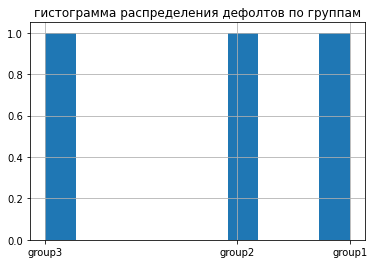

In [ ]:
plt.hist(x)
plt.xticks(x,g.defaulted.mean().index)
plt.title('гистограмма распределения дефолтов по группам')
plt.grid(True)

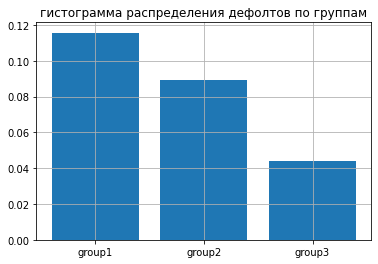

In [19]:
#переделел
plt.bar(g.defaulted.mean().index,x)
plt.title('гистограмма распределения дефолтов по группам')
plt.grid()

## Задача 11

 Какие выводы вы можете сделать? С увеличением возраста заемщика риск невозврата кредита становится больше или меньше? Дайте ответ на вопрос в текстовой ячейке ниже

Ответ: Чем выше возраст, тем меньше риск невозврата

## Задача 12

 Вычислите новый признак ```alone_and_poor```, который равен ```1``` у заемщиков, которые не содержат никого, кроме себя (```NumberOfDependents == 0```) и у которых месячный доход (```MonthlyIncome```) меньше 10% квантили по этому признаку среди всех заемщиков. Инече этот признак сделайте равным 0

Для этого напишите функцию ```calculate_alone_and_poor```, в которой вы будете принимать строку, доставать нужные поля у этой строки, и проверять перечисленные выше условия.

Заранее посчитайте значение 10% квантили по столбцу ```MonthlyIncome```, и передайте это значение в функцию как дефолтный аргумент

Затем полученную функцию примените ко всему датайрейму с помощью метода ```apply```. Не забудьте указать параметр ```axis=1``` в методе ```apply``` (применять переданную функцию ко строкам), иначе код упадет с ошибкой.

In [20]:
df.MonthlyIncome.quantile(q=0.1)

2005.0

In [21]:
def calculate_alone_and_poor(data, stringa, quantile_10=2005.0):
    lst=stringa.split(',')
    new_lst=[el.strip() for el in lst]
    # new_lst=['MonthlyIncome','NumberOfDependents']

    # quantile_10=2005.0

    if (data[new_lst[0]] < quantile_10) & (data[new_lst[1]] == 0):
      data=1
    else:
      data=0

    return data

In [23]:
s='MonthlyIncome, NumberOfDependents'

In [24]:
df.apply(calculate_alone_and_poor,args=(s,),axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Length: 150000, dtype: int64

In [25]:
df['alone_and_poor']=df.apply(calculate_alone_and_poor,args=(s,),axis=1)

In [26]:
df

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group,alone_and_poor
0,1,45,0.802982,9120.0,13,6,2.0,group2,0
1,0,40,0.121876,2600.0,4,0,1.0,group2,0
2,0,38,0.085113,3042.0,2,0,0.0,group2,0
3,0,30,0.036050,3300.0,5,0,0.0,group1,0
4,0,49,0.024926,63588.0,7,1,0.0,group2,0
...,...,...,...,...,...,...,...,...,...
149995,0,74,0.225131,2100.0,4,1,0.0,group3,0
149996,0,44,0.716562,5584.0,4,1,2.0,group2,0
149997,0,58,3870.000000,NaN,18,1,0.0,group3,0
149998,0,30,0.000000,5716.0,4,0,0.0,group1,0


In [ ]:
# 10%-квантиль


Сколько получилось людей с признаком ```alone_and_poor``` равным 1?

In [27]:
df[df.alone_and_poor == 1].shape[0]

8719

# Визуализация данных

## Задача 13

Постройте гистограмму распределения возрастов всех заемщиков. Для этого вам может понадобиться метод ```plot.hist()```. Обратите внимание, что у метода ```hist()``` есть параметр ```bins```, который отвечает за мелкость разбиения гистограммы. Постройте два отдельных графика с параметрами ```bins=10``` и ```bins=30```.

Подпишите оси, добавьте сетку на графики, дайте графикам название.

Также не забывайте, что чтобы картинка отрисовалась, нужно последней строкой кода написать ```plt.show()```

In [28]:
from matplotlib import pyplot as plt

In [ ]:
x=df.age

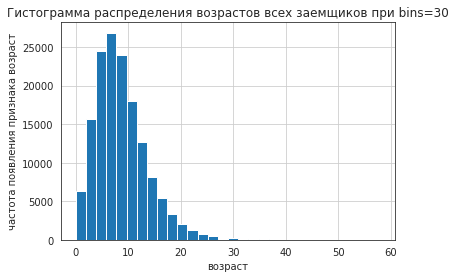

In [ ]:
plt.hist(x,bins=30)
plt.title("Гистограмма распределения возрастов всех заемщиков при bins=30")
plt.xlabel("возраст")
plt.ylabel("частота появления признака возраст")
plt.grid()

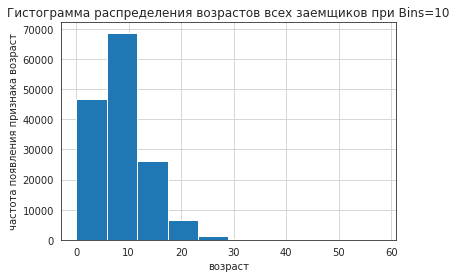

In [ ]:
plt.hist(x,bins=10)
plt.title("Гистограмма распределения возрастов всех заемщиков при Bins=10")
plt.xlabel("возраст")
plt.ylabel("частота появления признака возраст")
plt.grid()

## Задача 14
Теперь постройте гистограмму распределения числа открытых кредитных линий (```NumberOfOpenCreditLinesAndLoans```) с помощью функции ```distplot()``` из модуля ```seaborn```

Подпишите оси, добавьте сетку на графики, дайте графику название.

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


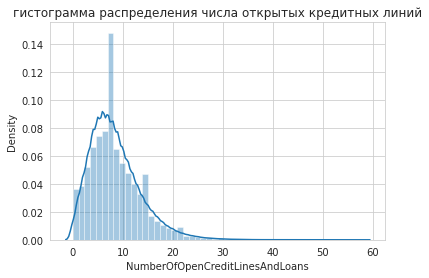

In [ ]:
x=df.NumberOfOpenCreditLinesAndLoans
ax=sns.distplot(x)
ax.set_title("гистограмма распределения числа открытых кредитных линий")
sns.set_style('white')
# plt.grid()

## Задача 15
Постройте гистограмму распределения признака ```NumberOfDependents``` для заемщиков, которые успешно вернули кредит (```defaulted = 0```)

Подпишите оси, добавьте сетку на графики, дайте графику название.

In [ ]:
x=df.NumberOfDependents[df.defaulted == 0]

([<matplotlib.axis.XTick at 0x7fae53200e10>,
 <a list of 20 Text major ticklabel objects>)

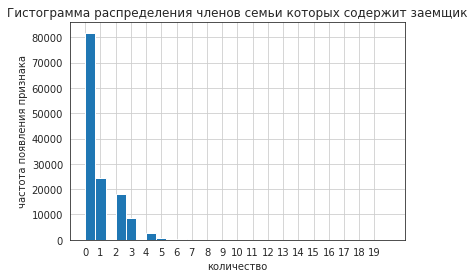

In [ ]:
plt.hist(x,bins=30)
plt.title("Гистограмма распределения членов семьи которых содержит заемщик")
plt.xlabel("количество")
plt.ylabel("частота появления признака")
plt.grid()
plt.xticks(np.arange(0, 20, step=1))

## Задача 16
Вычислите среднее значение признака ```NumberOfDependents``` для каждого возраста (```groupby``` по возрасту и ```mean``` от столбца ```NumberOfDependents```) и постройте гистограмму распределения полученных значений (```plot.bar()```)

Сделайте график покрупнее, например 14 на 10 дюймов с помощью параметра ```figsize```

Подпишите оси, добавьте сетку на графики, дайте графику название.

In [ ]:
g_age=df.groupby('age')

In [ ]:
for i,j in g_age:
  print(i)
  print(j)

In [ ]:
y=g_age.NumberOfDependents.mean()

In [ ]:
x=g_age.NumberOfDependents.mean().index

Text(0, 0.5, 'среднии значения NumberOfDependents по возрасту')

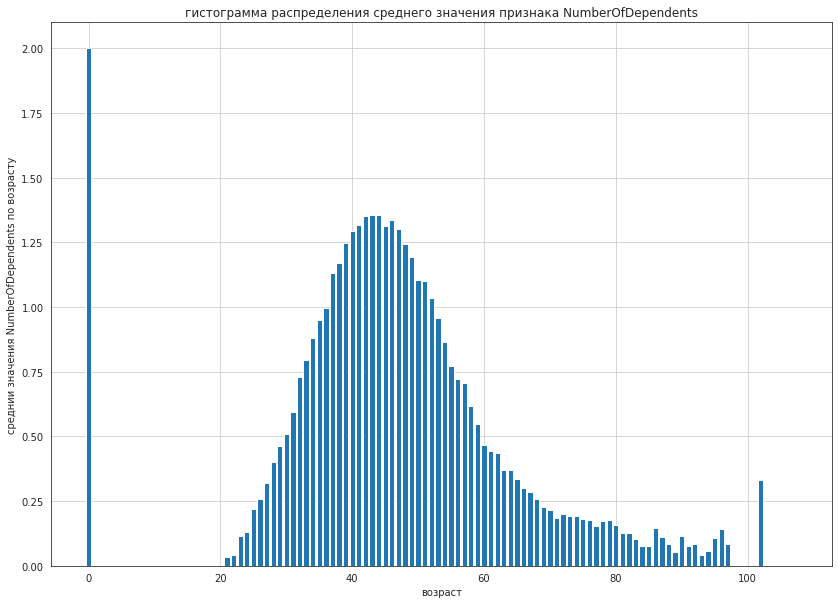

In [ ]:
fig = plt.figure(figsize=(14, 10))
plt.bar(x,y)
plt.grid()
plt.title("гистограмма распределения среднего значения признака NumberOfDependents")
plt.xlabel('возраст')
plt.ylabel('среднии значения NumberOfDependents по возрасту')

## Задача 17

 Видите ли вы теперь какие-то аномалии в данных? Определите, что это за аномалии, и очистите данные от этих аномалий. Затем снова постройте такой же график, как в предыдущем задании, только уже на датафрейме с очищенными выбросами

In [ ]:
g_age.NumberOfDependents.mean()

age
0      2.000000
21     0.032895
22     0.042929
23     0.113523
24     0.130263
         ...   
102    0.333333
103    0.000000
105         NaN
107    0.000000
109         NaN
Name: NumberOfDependents, Length: 86, dtype: float64

**Судя по графику выбиваются хвосты, это индексы g_age.NumberOfDependents.mean() со значением 0 и 102**


В возрасте ноль у заемщик только родился, у него не может быть членов семьи о которых бы он содержал). Так же, маловероятно что у человека в 102 года будет  людей больше, которых он должен содержать, чем у 70-80 летнего пенсионера. До таких возрастов редко доживают, а если и доживают, то содержат обычно потомки таких старцев, а не он их.

In [ ]:
new_y=g_age.NumberOfDependents.mean().drop(index=[0,102])

In [ ]:
new_y

age
21     0.032895
22     0.042929
23     0.113523
24     0.130263
25     0.218922
         ...   
101    0.000000
103    0.000000
105         NaN
107    0.000000
109         NaN
Name: NumberOfDependents, Length: 84, dtype: float64

In [ ]:
new_x=new_y.index

In [ ]:
new_x

Int64Index([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
             34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
             47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
             60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
             73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
             86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
             99, 101, 103, 105, 107, 109],
           dtype='int64', name='age')

Text(0, 0.5, 'среднии значения NumberOfDependents по возрасту')

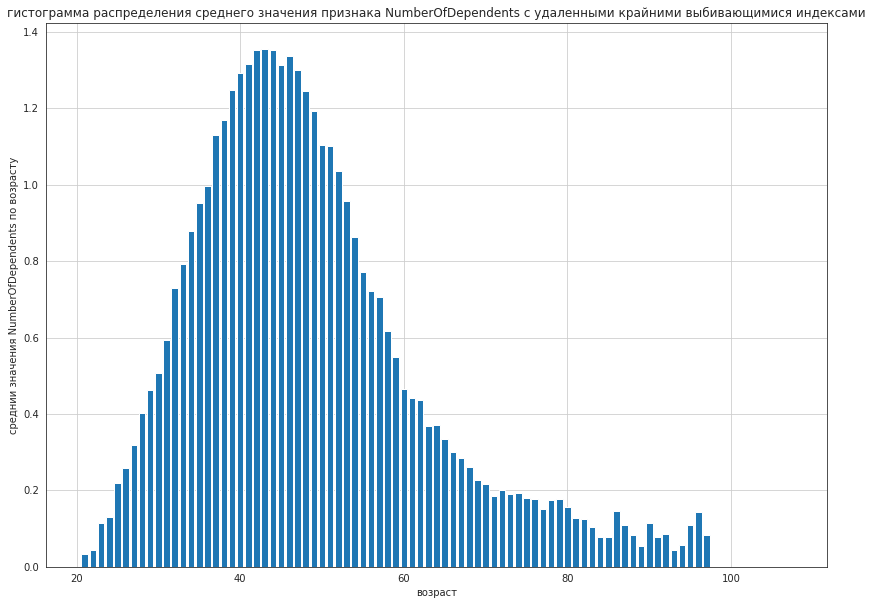

In [ ]:
fig = plt.figure(figsize=(14, 10))
plt.bar(new_x,new_y)
plt.grid()
plt.title("гистограмма распределения среднего значения признака NumberOfDependents с удаленными крайними выбивающимися индексами")
plt.xlabel('возраст')
plt.ylabel('среднии значения NumberOfDependents по возрасту')